In [1]:
import sys 
sys.path.append('..')

from models import DIFDensityEstimator,SoftmaxWeight,LocationScaleFlow
from models import EMDensityEstimator
from targets import Target, Uniform
%load_ext autoreload
%autoreload 2
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt

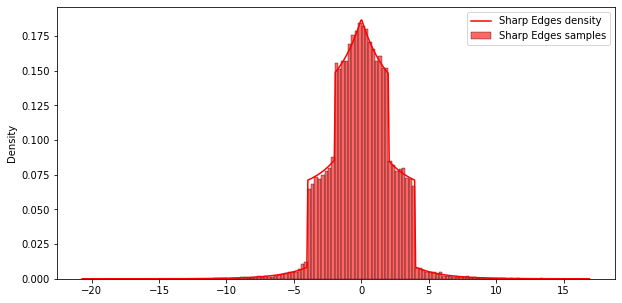

In [2]:
example = "Sharp Edges"
num_samples = 50000
target = Target(example, num_samples)
target.target_visual(num_samples = 30000)
p, target_log_density, target_samples = target.get_target()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:38<00:00,  6.30it/s, loss = 2.169674873352051]


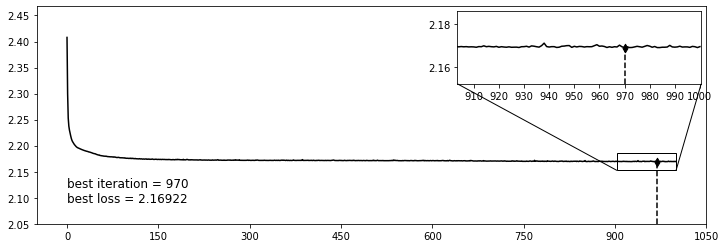

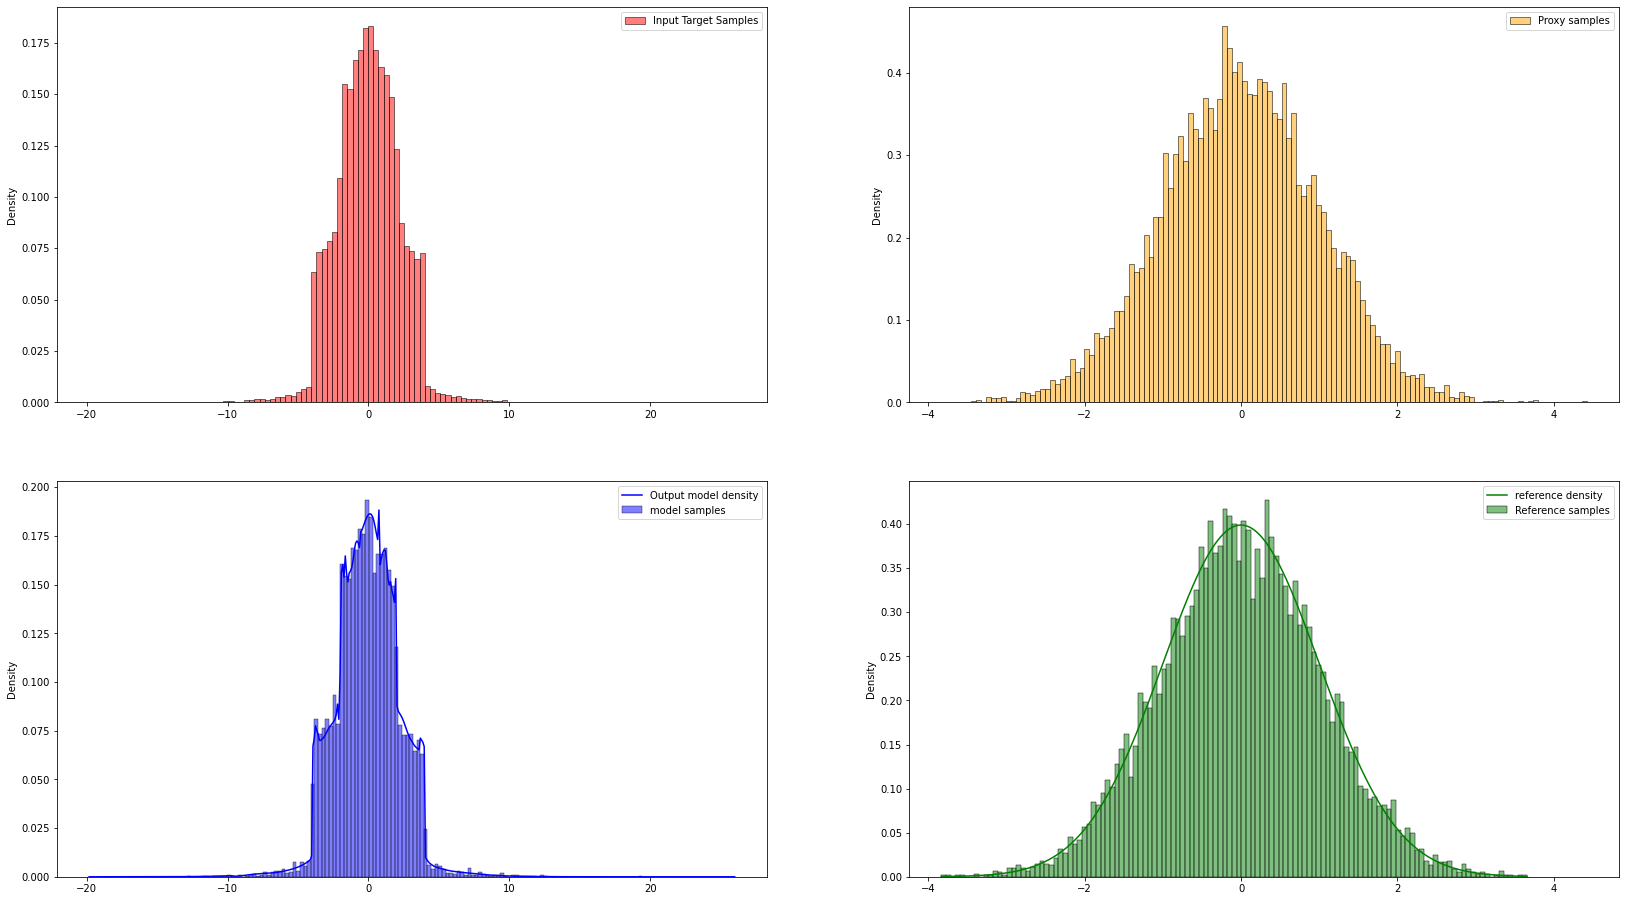

In [7]:
w = SoftmaxWeight(10, p, [10,10,10], mode = 'NN')
dif = DIFDensityEstimator(target_samples, 10, initial_w= w)
dif.train(1000,5000,visual = True)
dif.model_visual(num_samples = 10000)

  1%|█▋                                                                                                                                                                        | 1/100 [00:00<00:23,  4.19it/s, loss = 2.1955113410949707]

torch.Size([50000, 100, 1, 1])


  2%|███▍                                                                                                                                                                       | 2/100 [00:00<00:24,  4.07it/s, loss = 2.192173480987549]

torch.Size([50000, 100, 1, 1])


  3%|█████▏                                                                                                                                                                     | 3/100 [00:00<00:23,  4.04it/s, loss = 2.190958023071289]

torch.Size([50000, 100, 1, 1])


  4%|██████▊                                                                                                                                                                   | 4/100 [00:00<00:23,  4.14it/s, loss = 2.1900787353515625]

torch.Size([50000, 100, 1, 1])


  5%|████████▌                                                                                                                                                                  | 5/100 [00:01<00:23,  4.06it/s, loss = 2.189232587814331]

torch.Size([50000, 100, 1, 1])


  6%|██████████▎                                                                                                                                                                | 6/100 [00:01<00:23,  4.06it/s, loss = 2.188342571258545]

torch.Size([50000, 100, 1, 1])


  7%|███████████▉                                                                                                                                                              | 7/100 [00:01<00:23,  4.03it/s, loss = 2.1873931884765625]

torch.Size([50000, 100, 1, 1])


  8%|█████████████▋                                                                                                                                                             | 8/100 [00:01<00:22,  4.05it/s, loss = 2.186391830444336]

torch.Size([50000, 100, 1, 1])


  9%|███████████████▎                                                                                                                                                          | 9/100 [00:02<00:23,  3.89it/s, loss = 2.1853535175323486]

torch.Size([50000, 100, 1, 1])


 10%|████████████████▉                                                                                                                                                        | 10/100 [00:02<00:23,  3.91it/s, loss = 2.1842944622039795]

torch.Size([50000, 100, 1, 1])


 11%|██████████████████▋                                                                                                                                                       | 11/100 [00:02<00:22,  4.00it/s, loss = 2.183231830596924]

torch.Size([50000, 100, 1, 1])


 12%|████████████████████▍                                                                                                                                                     | 12/100 [00:02<00:21,  4.08it/s, loss = 2.182192802429199]

torch.Size([50000, 100, 1, 1])


 13%|█████████████████████▉                                                                                                                                                   | 13/100 [00:03<00:21,  4.04it/s, loss = 2.1812145709991455]

torch.Size([50000, 100, 1, 1])


 14%|███████████████████████▋                                                                                                                                                 | 14/100 [00:03<00:21,  4.05it/s, loss = 2.1803364753723145]

torch.Size([50000, 100, 1, 1])


 15%|█████████████████████████▌                                                                                                                                                | 15/100 [00:03<00:21,  4.04it/s, loss = 2.179586172103882]

torch.Size([50000, 100, 1, 1])


 16%|███████████████████████████▏                                                                                                                                              | 16/100 [00:03<00:20,  4.07it/s, loss = 2.178971290588379]

torch.Size([50000, 100, 1, 1])


 17%|████████████████████████████▋                                                                                                                                            | 17/100 [00:04<00:20,  4.10it/s, loss = 2.1784796714782715]

torch.Size([50000, 100, 1, 1])


 18%|██████████████████████████████▍                                                                                                                                          | 18/100 [00:04<00:20,  3.97it/s, loss = 2.1780896186828613]

torch.Size([50000, 100, 1, 1])


 19%|████████████████████████████████▎                                                                                                                                         | 19/100 [00:04<00:19,  4.06it/s, loss = 2.177776575088501]

torch.Size([50000, 100, 1, 1])


 20%|██████████████████████████████████                                                                                                                                        | 20/100 [00:04<00:19,  4.03it/s, loss = 2.177517890930176]

torch.Size([50000, 100, 1, 1])


 21%|███████████████████████████████████▍                                                                                                                                     | 21/100 [00:05<00:19,  4.07it/s, loss = 2.1772961616516113]

torch.Size([50000, 100, 1, 1])


 22%|█████████████████████████████████████▏                                                                                                                                   | 22/100 [00:05<00:19,  4.04it/s, loss = 2.1770992279052734]

torch.Size([50000, 100, 1, 1])


 23%|██████████████████████████████████████▊                                                                                                                                  | 23/100 [00:05<00:19,  4.05it/s, loss = 2.1769185066223145]

torch.Size([50000, 100, 1, 1])


 24%|████████████████████████████████████████▌                                                                                                                                | 24/100 [00:05<00:18,  4.12it/s, loss = 2.1767475605010986]

torch.Size([50000, 100, 1, 1])


 25%|██████████████████████████████████████████▌                                                                                                                               | 25/100 [00:06<00:18,  4.08it/s, loss = 2.176584005355835]

torch.Size([50000, 100, 1, 1])


 26%|████████████████████████████████████████████▏                                                                                                                             | 26/100 [00:06<00:18,  4.09it/s, loss = 2.176424741744995]

torch.Size([50000, 100, 1, 1])


 27%|█████████████████████████████████████████████▉                                                                                                                            | 27/100 [00:06<00:18,  3.96it/s, loss = 2.176267623901367]

torch.Size([50000, 100, 1, 1])


 28%|███████████████████████████████████████████████▌                                                                                                                          | 28/100 [00:06<00:18,  3.91it/s, loss = 2.176112174987793]

torch.Size([50000, 100, 1, 1])


 29%|█████████████████████████████████████████████████▎                                                                                                                        | 29/100 [00:07<00:17,  3.97it/s, loss = 2.175957679748535]

torch.Size([50000, 100, 1, 1])


 30%|██████████████████████████████████████████████████▋                                                                                                                      | 30/100 [00:07<00:17,  3.99it/s, loss = 2.1758031845092773]

torch.Size([50000, 100, 1, 1])


 31%|████████████████████████████████████████████████████▍                                                                                                                    | 31/100 [00:07<00:17,  4.01it/s, loss = 2.1756486892700195]

torch.Size([50000, 100, 1, 1])


 32%|██████████████████████████████████████████████████████                                                                                                                   | 32/100 [00:07<00:16,  4.03it/s, loss = 2.1754939556121826]

torch.Size([50000, 100, 1, 1])


 33%|███████████████████████████████████████████████████████▊                                                                                                                 | 33/100 [00:08<00:16,  4.03it/s, loss = 2.1753389835357666]

torch.Size([50000, 100, 1, 1])


 34%|█████████████████████████████████████████████████████████▊                                                                                                                | 34/100 [00:08<00:16,  3.91it/s, loss = 2.175184726715088]

torch.Size([50000, 100, 1, 1])


 35%|███████████████████████████████████████████████████████████▏                                                                                                             | 35/100 [00:08<00:16,  4.01it/s, loss = 2.1750316619873047]

torch.Size([50000, 100, 1, 1])


 36%|████████████████████████████████████████████████████████████▊                                                                                                            | 36/100 [00:08<00:16,  3.99it/s, loss = 2.1748809814453125]

torch.Size([50000, 100, 1, 1])


 37%|██████████████████████████████████████████████████████████████▉                                                                                                           | 37/100 [00:09<00:15,  4.04it/s, loss = 2.174734115600586]

torch.Size([50000, 100, 1, 1])


 38%|████████████████████████████████████████████████████████████████▏                                                                                                        | 38/100 [00:09<00:15,  3.93it/s, loss = 2.1745917797088623]

torch.Size([50000, 100, 1, 1])


 39%|█████████████████████████████████████████████████████████████████▉                                                                                                       | 39/100 [00:09<00:15,  3.96it/s, loss = 2.1744563579559326]

torch.Size([50000, 100, 1, 1])


 40%|███████████████████████████████████████████████████████████████████▌                                                                                                     | 40/100 [00:09<00:15,  3.99it/s, loss = 2.1743288040161133]

torch.Size([50000, 100, 1, 1])


 41%|██████████████████████████████████████████████████████████████████████▌                                                                                                     | 41/100 [00:10<00:14,  4.03it/s, loss = 2.1742103099823]

torch.Size([50000, 100, 1, 1])


 42%|██████████████████████████████████████████████████████████████████████▉                                                                                                  | 42/100 [00:10<00:14,  4.01it/s, loss = 2.1741015911102295]

torch.Size([50000, 100, 1, 1])


 43%|████████████████████████████████████████████████████████████████████████▋                                                                                                | 43/100 [00:10<00:14,  3.97it/s, loss = 2.1740031242370605]

torch.Size([50000, 100, 1, 1])


 44%|██████████████████████████████████████████████████████████████████████████▊                                                                                               | 44/100 [00:10<00:14,  3.99it/s, loss = 2.173914909362793]

torch.Size([50000, 100, 1, 1])


 45%|████████████████████████████████████████████████████████████████████████████▌                                                                                             | 45/100 [00:11<00:13,  3.95it/s, loss = 2.173837423324585]

torch.Size([50000, 100, 1, 1])


 46%|█████████████████████████████████████████████████████████████████████████████▋                                                                                           | 46/100 [00:11<00:13,  3.88it/s, loss = 2.1737687587738037]

torch.Size([50000, 100, 1, 1])


 47%|███████████████████████████████████████████████████████████████████████████████▍                                                                                         | 47/100 [00:11<00:13,  3.93it/s, loss = 2.1737091541290283]

torch.Size([50000, 100, 1, 1])


 48%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 48/100 [00:11<00:13,  3.98it/s, loss = 2.173657178878784]

torch.Size([50000, 100, 1, 1])


 49%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 49/100 [00:12<00:12,  4.02it/s, loss = 2.173612117767334]

torch.Size([50000, 100, 1, 1])


 50%|█████████████████████████████████████████████████████████████████████████████████████                                                                                     | 50/100 [00:12<00:12,  4.02it/s, loss = 2.173572540283203]

torch.Size([50000, 100, 1, 1])


 51%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 51/100 [00:12<00:12,  4.04it/s, loss = 2.1735377311706543]

torch.Size([50000, 100, 1, 1])


 52%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 52/100 [00:12<00:11,  4.03it/s, loss = 2.17350697517395]

torch.Size([50000, 100, 1, 1])


 53%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 53/100 [00:13<00:11,  4.08it/s, loss = 2.1734795570373535]

torch.Size([50000, 100, 1, 1])


 54%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 54/100 [00:13<00:11,  4.05it/s, loss = 2.173454761505127]

torch.Size([50000, 100, 1, 1])


 55%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                            | 55/100 [00:13<00:11,  4.08it/s, loss = 2.1734321117401123]

torch.Size([50000, 100, 1, 1])


 56%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 56/100 [00:13<00:10,  4.04it/s, loss = 2.1734116077423096]

torch.Size([50000, 100, 1, 1])


 57%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 57/100 [00:14<00:10,  4.02it/s, loss = 2.1733922958374023]

torch.Size([50000, 100, 1, 1])


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 58/100 [00:14<00:10,  4.06it/s, loss = 2.1733741760253906]

torch.Size([50000, 100, 1, 1])


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 59/100 [00:14<00:10,  4.07it/s, loss = 2.1733572483062744]

torch.Size([50000, 100, 1, 1])


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 60/100 [00:14<00:09,  4.09it/s, loss = 2.1733410358428955]

torch.Size([50000, 100, 1, 1])


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 61/100 [00:15<00:09,  4.04it/s, loss = 2.173325300216675]

torch.Size([50000, 100, 1, 1])


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 62/100 [00:15<00:09,  4.06it/s, loss = 2.1733105182647705]

torch.Size([50000, 100, 1, 1])


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 63/100 [00:15<00:09,  3.98it/s, loss = 2.1732962131500244]

torch.Size([50000, 100, 1, 1])


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 64/100 [00:15<00:09,  3.95it/s, loss = 2.1732823848724365]

torch.Size([50000, 100, 1, 1])


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 65/100 [00:16<00:09,  3.88it/s, loss = 2.173269033432007]

torch.Size([50000, 100, 1, 1])


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 66/100 [00:16<00:08,  3.92it/s, loss = 2.1732559204101562]

torch.Size([50000, 100, 1, 1])


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 67/100 [00:16<00:08,  4.01it/s, loss = 2.1732430458068848]

torch.Size([50000, 100, 1, 1])


 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 68/100 [00:16<00:07,  4.04it/s, loss = 2.1732306480407715]

torch.Size([50000, 100, 1, 1])


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 69/100 [00:17<00:07,  4.00it/s, loss = 2.1732184886932373]

torch.Size([50000, 100, 1, 1])


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 70/100 [00:17<00:07,  3.99it/s, loss = 2.1732065677642822]

torch.Size([50000, 100, 1, 1])


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 71/100 [00:17<00:07,  4.02it/s, loss = 2.1731948852539062]

torch.Size([50000, 100, 1, 1])


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 72/100 [00:17<00:07,  3.98it/s, loss = 2.1731834411621094]

torch.Size([50000, 100, 1, 1])


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 73/100 [00:18<00:06,  3.98it/s, loss = 2.1731722354888916]

torch.Size([50000, 100, 1, 1])


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 74/100 [00:18<00:06,  3.94it/s, loss = 2.173161029815674]

torch.Size([50000, 100, 1, 1])


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 75/100 [00:18<00:06,  4.02it/s, loss = 2.173150062561035]

torch.Size([50000, 100, 1, 1])


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 76/100 [00:18<00:05,  4.07it/s, loss = 2.1731390953063965]

torch.Size([50000, 100, 1, 1])


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 77/100 [00:19<00:05,  4.07it/s, loss = 2.173128604888916]

torch.Size([50000, 100, 1, 1])


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 78/100 [00:19<00:05,  4.06it/s, loss = 2.1731181144714355]

torch.Size([50000, 100, 1, 1])


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 79/100 [00:19<00:05,  4.08it/s, loss = 2.173107862472534]

torch.Size([50000, 100, 1, 1])


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 80/100 [00:19<00:04,  4.05it/s, loss = 2.1730973720550537]

torch.Size([50000, 100, 1, 1])


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 81/100 [00:20<00:04,  3.95it/s, loss = 2.1730871200561523]

torch.Size([50000, 100, 1, 1])


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 82/100 [00:20<00:04,  3.91it/s, loss = 2.17307710647583]

torch.Size([50000, 100, 1, 1])


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 83/100 [00:20<00:04,  3.95it/s, loss = 2.1730668544769287]

torch.Size([50000, 100, 1, 1])


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 84/100 [00:20<00:03,  4.02it/s, loss = 2.1730570793151855]

torch.Size([50000, 100, 1, 1])


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 85/100 [00:21<00:03,  4.05it/s, loss = 2.1730473041534424]

torch.Size([50000, 100, 1, 1])


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 86/100 [00:21<00:03,  4.06it/s, loss = 2.173037528991699]

torch.Size([50000, 100, 1, 1])


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 87/100 [00:21<00:03,  4.08it/s, loss = 2.173027515411377]

torch.Size([50000, 100, 1, 1])


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 88/100 [00:21<00:02,  4.12it/s, loss = 2.173017978668213]

torch.Size([50000, 100, 1, 1])


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 89/100 [00:22<00:02,  4.13it/s, loss = 2.1730079650878906]

torch.Size([50000, 100, 1, 1])


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 90/100 [00:22<00:02,  4.06it/s, loss = 2.1729981899261475]

torch.Size([50000, 100, 1, 1])


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 91/100 [00:22<00:02,  4.03it/s, loss = 2.1729886531829834]

torch.Size([50000, 100, 1, 1])


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 92/100 [00:22<00:01,  4.03it/s, loss = 2.172978639602661]

torch.Size([50000, 100, 1, 1])


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 93/100 [00:23<00:01,  4.09it/s, loss = 2.172968864440918]

torch.Size([50000, 100, 1, 1])


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 94/100 [00:23<00:01,  4.08it/s, loss = 2.1729588508605957]

torch.Size([50000, 100, 1, 1])


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 95/100 [00:23<00:01,  4.08it/s, loss = 2.1729488372802734]

torch.Size([50000, 100, 1, 1])


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 96/100 [00:23<00:00,  4.12it/s, loss = 2.172938823699951]

torch.Size([50000, 100, 1, 1])


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 97/100 [00:24<00:00,  4.12it/s, loss = 2.1729283332824707]

torch.Size([50000, 100, 1, 1])


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 98/100 [00:24<00:00,  4.12it/s, loss = 2.1729180812835693]

torch.Size([50000, 100, 1, 1])


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [00:24<00:00,  4.10it/s, loss = 2.1729073524475098]

torch.Size([50000, 100, 1, 1])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.03it/s, loss = 2.17289662361145]

torch.Size([50000, 100, 1, 1])


tensor(1.0000, grad_fn=<SumBackward0>)


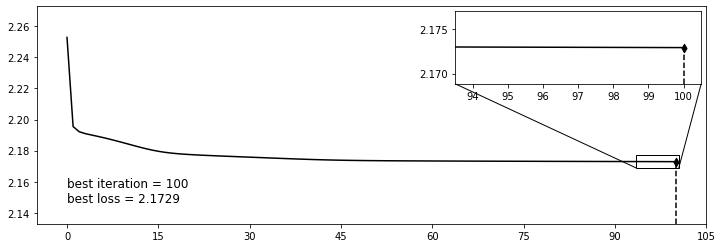

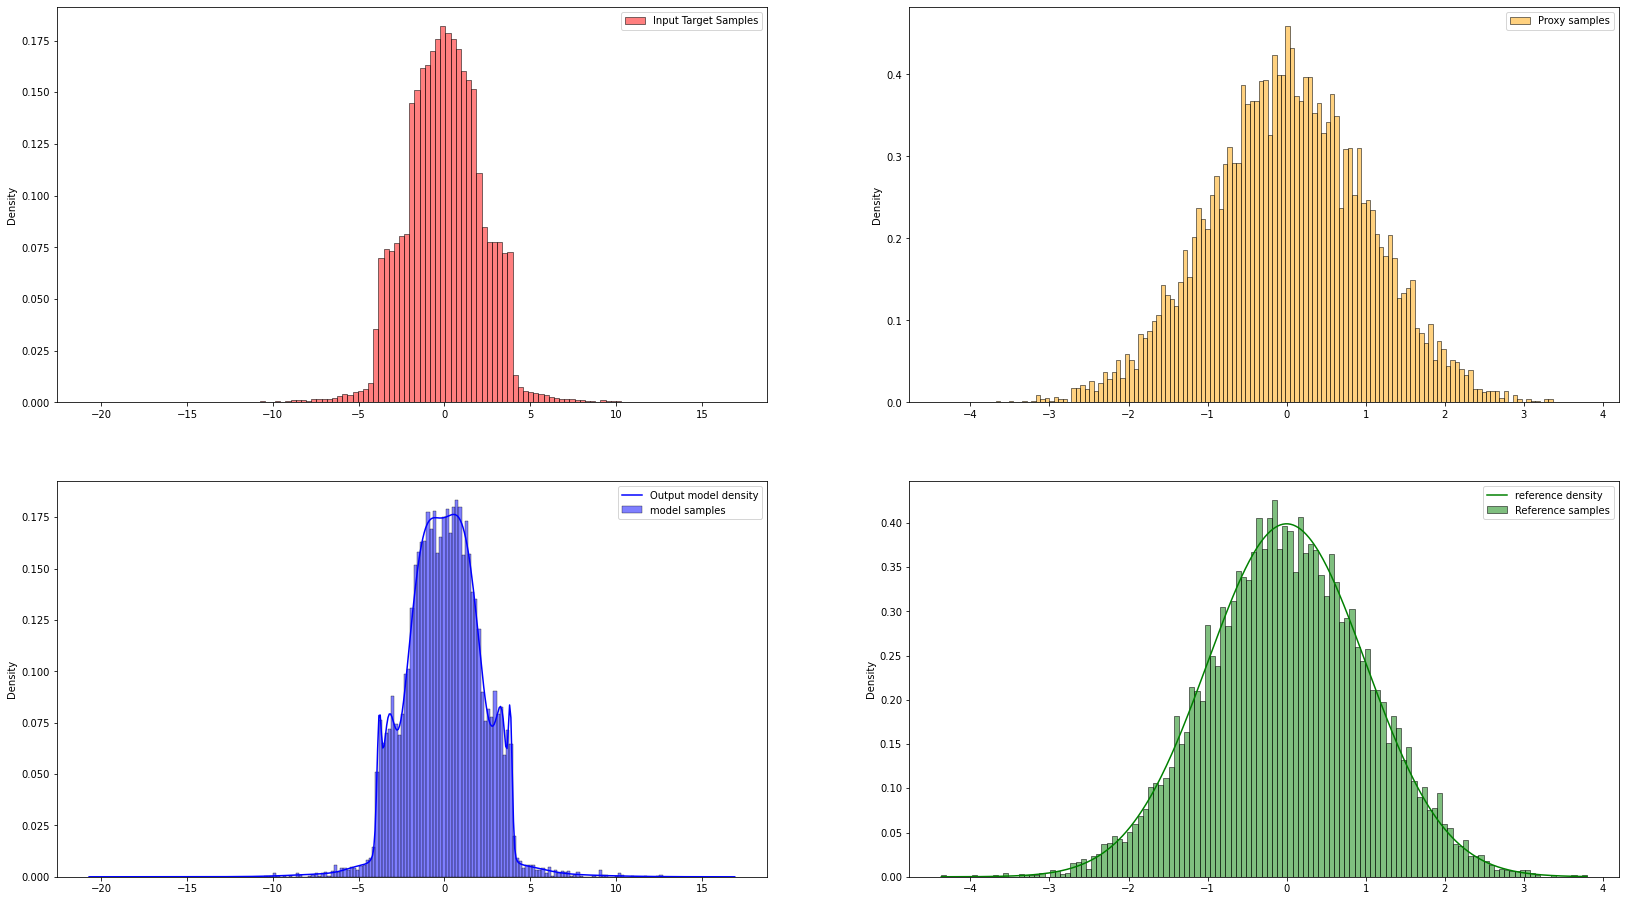

In [6]:
dif = EMDensityEstimator(target_samples.to(torch.device('cuda')), 100)
dif.train(100, visual = True)
dif.model_visual(num_samples = 10000)